## Titanic Classification
This is just the first draft...

import some libraries:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

Load the datasets:

In [2]:
data_train = pd.read_csv('./all/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv('./all/test.csv')
data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
data_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
data_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [6]:
data_test['Fare'].isna().sum()

1

In [7]:
data_test[data_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
data_test['Age'].isna().sum()

86

In [9]:
data_test['Cabin'].isna().sum()

327

In [10]:
data_test.shape

(418, 11)

More then 3/4 passengers in test dataset are missing Cabin feature - no use of this feature i think.
But let's check in train dataset

In [11]:
data_train.shape

(891, 12)

In [12]:
data_train['Cabin'].isna().sum()

687

In [13]:
data_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [14]:
data_train['Survived'].mean()

0.3838383838383838

In [15]:
data_train[data_train['Cabin'].isna()]['Survived'].mean()

0.29985443959243085

In [16]:
data_train[data_train['Cabin'].isna() == False]['Survived'].mean()

0.6666666666666666

Well... I think i'll need the feature :)

In [17]:
data1_train = data_train.fillna({'Cabin': 'Unknown', 'Age': 0, 'Embarked': 'S'})
data1_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [77]:
data_train['Embarked'].isna().sum()

2

In [78]:
data1_train['Age'].isna().sum()

177

In [89]:
data1_train[data1_train['Age'] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,Unknown,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,0.0,0,0,244373,13.0000,Unknown,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,0.0,0,0,2649,7.2250,Unknown,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,0.0,0,0,2631,7.2250,Unknown,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0.0,0,0,330959,7.8792,Unknown,Q


In [91]:
data1_train[data_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [100]:
data1_train[data1_train['Pclass'] == 1].groupby('Embarked').max()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,890,1,1,"Young, Miss. Marie Grice",male,71.0,2,2,PC 17761,512.3292,Unknown
Q,413,1,1,"Minahan, Miss. Daisy E",male,44.0,2,0,19928,90.0000,C78
S,888,1,1,"Wright, Mr. George",male,80.0,3,4,WE/P 5735,263.0000,Unknown


In [109]:
Ticket_filter = (data1_train['Ticket'].apply(type) == int) 
d1 = data1_train[Ticket_filter]
#T_filter2 = d1['Ticket'] > 113000 and d1['Ticket'] < 114000
#d1[T_filter2].shape
d1.shape

(0, 12)

In [118]:
data1_train['ticket type']= data1_train['Ticket'].apply(type)
data1_train.groupby('ticket type').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ticket type,,,,,,,,,,,,
<class 'str'>,891,891,891,891,891,891,891,891,891,891,891,889


In [119]:
def getIntTickets(ticket):
    try:
        return int(ticket)
    except:
        return 0

In [128]:
data1_train['ticket_int'] = data1_train['Ticket'].apply(getIntTickets)
data1_train.shape

(891, 14)

In [133]:
tf = (data1_train['ticket_int'] > 113200) & (data1_train['ticket_int'] < 113800)
data1_train[tf].groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,ticket type,ticket_int
Embarked,,,,,,,,,,,,,
C,3,3,3,3,3,3,3,3,3,3,3,3,3
S,28,28,28,28,28,28,28,28,28,28,28,28,28


Ok. Suppose it's S - shouldn't be of any importance anyway

# Data cleaning cell:

In [6]:
data_test = data_test.fillna({'Cabin' : 'Unknown', 'Age' : 0, 'Fare' : 50.0})
data_train = data_train.fillna({'Cabin': 'Unknown', 'Age': 0, 'Embarked': 'S'})
data_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [7]:
data_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [8]:
y = data_train['Survived']
X = data_train.drop(['PassengerId', 'Survived', 'Name'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,Unknown,S


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75, stratify=X['Embarked'])
X_train.shape

(623, 9)

In [10]:
XY = X_train.copy()
XY['y'] = y_train
XY.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y
526,2,female,50.0,0,0,W./C. 14258,10.5000,Unknown,S,1
139,1,male,24.0,0,0,PC 17593,79.2000,B86,C,0
97,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
48,3,male,0.0,2,0,2662,21.6792,Unknown,C,0
740,1,male,0.0,0,0,16988,30.0000,D45,S,1


In [11]:
XY.groupby('Embarked').mean()

,Pclass,Age,SibSp,Parch,Fare,y
Embarked,,,,,,
C,1.786325,24.824103,0.384615,0.324786,63.962431,0.547009
Q,2.925926,9.500000,0.444444,0.129630,12.823150,0.333333
S,2.345133,26.146018,0.579646,0.415929,27.138548,0.338496


In [12]:
XY.groupby(['Sex', 'Pclass', 'Embarked'])['y'].mean()

Sex     Pclass  Embarked
female  1       C           0.970588
                Q           1.000000
                S           0.945946
        2       C           1.000000
                Q           1.000000
                S           0.936170
        3       C           0.600000
                Q           0.666667
                S           0.301587
male    1       C           0.387097
                S           0.345455
        2       C           0.000000
                Q           0.000000
                S           0.138462
        3       C           0.200000
                Q           0.066667
                S           0.145946
Name: y, dtype: float64

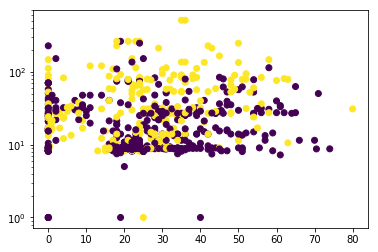

In [13]:
plt.scatter(X_train['Age'], X_train['Fare'] + 1, c=y_train)
plt.yscale('log')
plt.show()

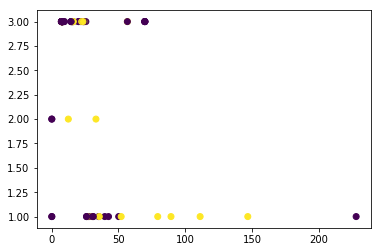

In [14]:
test = XY[XY['Age'] == 0].copy()
test['CorFare'] = test['Fare'] + random.random() *0.2
plt.scatter(test['CorFare'], test['Pclass'], c=test['y'])
plt.show()

In [15]:
test.groupby('Pclass')['y'].mean()

Pclass
1    0.400000
2    0.500000
3    0.204301
Name: y, dtype: float64

In [16]:
XY.groupby('Pclass')['y'].mean()

Pclass
1    0.632911
2    0.468254
3    0.224189
Name: y, dtype: float64

In [17]:
test2 = XY.groupby('Ticket').mean()
test2[test2['y'] > 0][test2['y'] < 1].shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(30, 6)

In [18]:
test3 = XY.groupby('Ticket').count()
test3[test3['y'] > 1].shape

(80, 9)

In [19]:
test3[test3['y'] > 2].shape

(22, 9)

In [20]:
test4 = XY[XY['Cabin'] != 'Unknown'].groupby('Cabin').mean()
test4[test4['y'] > 0][test4['y'] < 1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Pclass,Age,SibSp,Parch,Fare,y
Cabin,,,,,,
B58 B60,1.0,37.000000,0.000000,1.000000,247.520800,0.500000
C123,1.0,36.000000,1.000000,0.000000,53.100000,0.500000
C2,1.0,25.500000,1.000000,0.000000,66.600000,0.500000
C23 C25 C27,1.0,22.000000,3.000000,2.000000,263.000000,0.666667
C65,1.0,17.500000,1.000000,0.000000,108.900000,0.500000
C83,1.0,40.000000,1.000000,0.000000,83.475000,0.500000
D,2.0,31.666667,0.000000,0.000000,13.222233,0.666667
E44,1.0,44.500000,1.000000,0.000000,55.900000,0.500000
F2,2.0,13.833333,0.666667,1.333333,26.000000,0.666667


In [21]:
test5 = XY[XY['Cabin'] != 'Unknown'].groupby('Cabin').count()
test5[test5['y'] > 1].shape

(25, 9)

In [22]:
test5.shape

(118, 9)

In [23]:
XY[XY['Age'] > 14].groupby(['Pclass','Sex']).mean()

Age     SibSp     Parch        Fare         y
Pclass Sex                                                        
1      female  34.692308  0.569231  0.461538  108.277563  0.969231
       male    42.384058  0.318841  0.173913   63.334904  0.376812
2      female  32.322222  0.488889  0.666667   21.497316  0.933333
       male    35.196970  0.363636  0.166667   21.828724  0.060606
3      female  27.616667  0.466667  0.716667   13.750210  0.366667
       male    28.959732  0.201342  0.087248   10.261489  0.140940

In [60]:
def getAgeClass(age):
    if age == 0:
        return 'Unknown'
    elif age < 16:
        return 'Child'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'

In [61]:
XY['Age Class'] = XY['Age'].apply(getAgeClass)
XY.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y,Age Class
526,2,female,50.0,0,0,W./C. 14258,10.5000,Unknown,S,1,adult
139,1,male,24.0,0,0,PC 17593,79.2000,B86,C,0,adult
97,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1,adult
48,3,male,0.0,2,0,2662,21.6792,Unknown,C,0,Unknown
740,1,male,0.0,0,0,16988,30.0000,D45,S,1,Unknown


In [63]:
XY.groupby(['Age Class', 'Pclass', 'Sex'])['y'].mean()

Age Class  Pclass  Sex   
Child      1       female    0.500000
                   male      1.000000
           2       female    1.000000
                   male      1.000000
           3       female    0.526316
                   male      0.318182
Unknown    1       female    1.000000
                   male      0.200000
           2       female    1.000000
                   male      0.000000
           3       female    0.541667
                   male      0.086957
adult      1       female    0.967742
                   male      0.416667
           2       female    0.933333
                   male      0.063492
           3       female    0.327273
                   male      0.143836
senior     1       female    1.000000
                   male      0.111111
           2       male      0.000000
           3       female    1.000000
                   male      0.000000
Name: y, dtype: float64

In [32]:
XY['isCabin'] = (XY['Cabin'] != 'Unknown')
XY['isFemale'] = (XY['Sex'] == 'female')

In [33]:
XY.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y,isCabin,isFemale
526,2,female,50.0,0,0,W./C. 14258,10.5,Unknown,S,1,False,True
139,1,male,24.0,0,0,PC 17593,79.2,B86,C,0,True,False


In [35]:
X1_train = XY[['Pclass', 'Age', 'isFemale', 'isCabin']]
X1_train.head()

,Pclass,Age,isFemale,isCabin
526,2,50.0,True,False
139,1,24.0,False,True
97,1,23.0,False,True
48,3,0.0,False,False
740,1,0.0,False,True


In [36]:
X1_test = X_test[['Pclass', 'Age']].copy()
X1_test['isFemale'] = (X_test['Sex'] == 'female')
X1_test['isCabin'] = (X_test['Cabin'] != 'Unknown')
X1_test.head()

,Pclass,Age,isFemale,isCabin
662,1,47.0,False,True
692,3,0.0,False,False
477,3,29.0,False,False
280,3,65.0,False,False
714,2,52.0,False,False


In [40]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier()]
names = ['Decision Tree', 'Random Forest']
params =[{'max_depth': range(1, 20, 1), 'min_samples_split': range(2,5)},
         {'max_depth': range(1, 20, 1), 'min_samples_split': range(2,5)}]
result = pd.DataFrame(columns=['Classifier', 'Scaled', 'best_params', 'best_score', 'test_score'])

In [38]:
def fitGlobalParams(X_train, y_train, X_test, y_test, name, parameters, svr, scaled):
    clf = GridSearchCV(svr, parameters, cv=5, return_train_score=True)
    clf.fit(X_train, y_train)
    print('********************************************')
    print(name + 'scaled = ' + str(scaled))
    print('********************************************')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print('Best parameters:', clf.best_params_)
    print(clf.best_score_, accuracy_score(y_test, clf.predict(X_test)))
    result.loc[result.shape[0]]=[name, scaled, clf.best_params_,
                                 clf.best_score_, accuracy_score(y_test, clf.predict(X_test))]



In [41]:
for name, svr, param in zip(names, classifiers, params):
    fitGlobalParams(X1_train, y_train, X1_test, y_test, name, param, svr, False)

********************************************
Decision Treescaled = False
********************************************
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 2}
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 3}
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 4}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 2}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 3}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 4}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 2}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 3}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 4}
0.791 (+/-0.075) for {'max_depth': 4, 'min_samples_split': 2}
0.791 (+/-0.075) for {'max_depth': 4, 'min_samples_split': 3}
0.791 (+/-0.075) for {'max_depth': 4, 'min_samples_split': 4}
0.787 (+/-0.062) for {'max_depth': 5, 'min_samples_split': 2}
0.787 (+/-0.062) for {'max_depth': 5, 'min_samples_split': 3}
0.791 (+/-0.05

In [42]:
result

,Classifier,Scaled,best_params,best_score,test_score
0,Decision Tree,False,"{'max_depth': 2, 'min_samples_split': 2}",0.804173,0.746269
1,Random Forest,False,"{'max_depth': 9, 'min_samples_split': 2}",0.802568,0.768657


In [48]:
XY.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'y', 'isCabin', 'isFemale'],
      dtype='object')

In [57]:
X2_train = X1_train.copy()
X2_train['Parch'] = XY['Parch']
#X2_train['Embarked'] = XY['Embarked']
X2_train.head()

,Pclass,Age,isFemale,isCabin,Parch
526,2,50.0,True,False,0
139,1,24.0,False,True,0
97,1,23.0,False,True,1
48,3,0.0,False,False,0
740,1,0.0,False,True,0


In [58]:
X2_test = X1_test.copy()
X2_test['Parch'] = X_test['Parch']
#X2_test['Embarked'] = X_test['Embarked']
X2_test.head()

,Pclass,Age,isFemale,isCabin,Parch
662,1,47.0,False,True,0
692,3,0.0,False,False,0
477,3,29.0,False,False,0
280,3,65.0,False,False,0
714,2,52.0,False,False,0


In [59]:
for name, svr, param in zip(names, classifiers, params):
    fitGlobalParams(X2_train, y_train, X2_test, y_test, name, param, svr, False)

********************************************
Decision Treescaled = False
********************************************
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 2}
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 3}
0.780 (+/-0.057) for {'max_depth': 1, 'min_samples_split': 4}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 2}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 3}
0.804 (+/-0.071) for {'max_depth': 2, 'min_samples_split': 4}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 2}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 3}
0.787 (+/-0.052) for {'max_depth': 3, 'min_samples_split': 4}
0.796 (+/-0.077) for {'max_depth': 4, 'min_samples_split': 2}
0.796 (+/-0.077) for {'max_depth': 4, 'min_samples_split': 3}
0.799 (+/-0.077) for {'max_depth': 4, 'min_samples_split': 4}
0.795 (+/-0.059) for {'max_depth': 5, 'min_samples_split': 2}
0.795 (+/-0.059) for {'max_depth': 5, 'min_samples_split': 3}
0.801 (+/-0.05

In [61]:
X_train_NB =X1_train[['isFemale', 'isCabin']]
X_train_NB['Age isKnown'] = (XY['Age'] > 0)
X_train_NB['isChild'](XY['Age'])
X_train_NB

,isFemale,isCabin
526,True,False
139,False,True
97,False,True
48,False,False
740,False,True
817,False,False
351,False,True
21,False,True
849,True,True
482,False,False
